In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

In [2]:
# Connect to the SQLite database
conn = sqlite3.connect('healthtech_analytics.db')

# Exploratory Data Analysis (EDA)

In [3]:
patients_df = pd.read_sql_query("SELECT * FROM patients;", conn)
visits_df = pd.read_sql_query("SELECT * FROM visits;", conn)
doctors_df = pd.read_sql_query("SELECT * FROM doctors;", conn)
treatments_df = pd.read_sql_query("SELECT * FROM treatments;", conn)
diagnoses_df = pd.read_sql_query("SELECT * FROM diagnoses;", conn)



In [4]:
#Checking for any missing values(nulls) per column for each table
print("Missing values in patients:")
print(patients_df.isnull().sum())

print("\nMissing values in visits:")
print(visits_df.isnull().sum())

print("\nMissing values in doctors:")
print(doctors_df.isnull().sum())

print("\nMissing values in treatments:")
print(treatments_df.isnull().sum())

print("\nMissing values in diagnoses:")
print(diagnoses_df.isnull().sum())


Missing values in patients:
patient_id    0
name          0
gender        0
birth_date    0
city          0
dtype: int64

Missing values in visits:
visit_id          0
patient_id        0
visit_date        0
doctor_id         0
diagnosis_code    0
dtype: int64

Missing values in doctors:
doctor_id     0
name          0
department    0
dtype: int64

Missing values in treatments:
treatment_id      0
visit_id          0
treatment_name    0
treatment_cost    0
dtype: int64

Missing values in diagnoses:
diagnosis_code           0
diagnosis_description    0
dtype: int64


In [5]:
#Checking for any duplicates
print("patients:", patients_df.duplicated().sum())
print("visits:", visits_df.duplicated().sum())
print("doctors:", doctors_df.duplicated().sum())
print("treatments:", treatments_df.duplicated().sum())
print("diagnoses:", diagnoses_df.duplicated().sum())

patients: 0
visits: 0
doctors: 0
treatments: 0
diagnoses: 0


# 1. Data Setup & Exploration

## Write a query to list the number of patients by city.


In [6]:
query = """
SELECT city, COUNT(*) AS num_patients
FROM patients
GROUP BY city
ORDER BY num_patients DESC;
"""
df_city = pd.read_sql_query(query, conn)

## Display results using a bar chart

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_17820\367635604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_city, x='num_patients', y='city', palette='Blues_d')


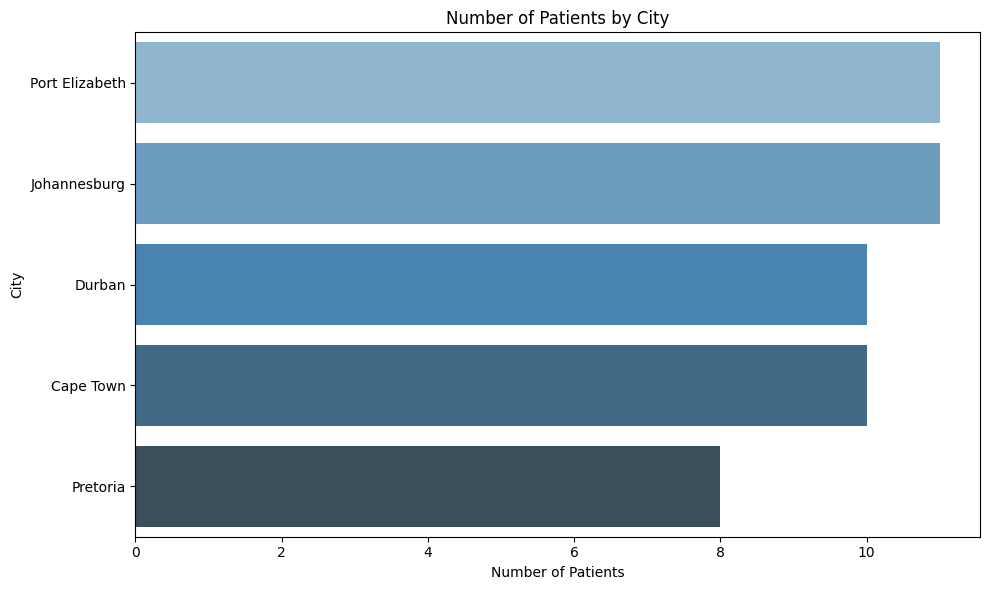

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_city, x='num_patients', y='city', palette='Blues_d')
plt.title('Number of Patients by City')
plt.xlabel('Number of Patients')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# 2. Diagnosis Trends by Department

## Write a SQL query to calculate how many diagnoses are made per department.Join the necessary tables (visits, doctors, and diagnoses) and present the results in a table.

 


In [8]:
# Task 2: Diagnosis Trends by Department
query= """
SELECT d.department, COUNT(v.diagnosis_code) AS diagnosis_count
FROM visits v
JOIN doctors d ON v.doctor_id = d.doctor_id
GROUP BY d.department
ORDER BY diagnosis_count DESC;
"""
diagnoses_by_department = pd.read_sql_query(query, conn)
print(diagnoses_by_department)

         department  diagnosis_count
0        Pediatrics              108
1        Cardiology               38
2  General Medicine               34
3         Neurology               20


## Interpret the results briefly in Markdown.

### From the table, it is evident that the Pediatrics department has the highest number of diagnoses, with a total of 108 which is more than the combined total of all other departments. In contrast, the Neurology department has the lowest diagnosis count, indicating a lower volume or more specialized nature of care.

# 3. Cost Analysis per Patient

## Write a query to calculate the total cost of treatments per patient and 

In [9]:

query3 = """
SELECT p.name AS patient_name, SUM(t.treatment_cost) AS total_spending
FROM patients p
JOIN visits v ON p.patient_id = v.patient_id
JOIN treatments t ON v.visit_id = t.visit_id
GROUP BY p.patient_id, p.name
ORDER BY total_spending DESC
LIMIT 5;
"""
df_spending = pd.read_sql_query(query3, conn)

print(df_spending)



  patient_name  total_spending
0   Patient_15        21500.20
1   Patient_32        18178.63
2   Patient_31        17031.56
3   Patient_34        14674.41
4   Patient_18        13576.29


##  Display a horizontal bar chart of their names and spending.

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_17820\3160157471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


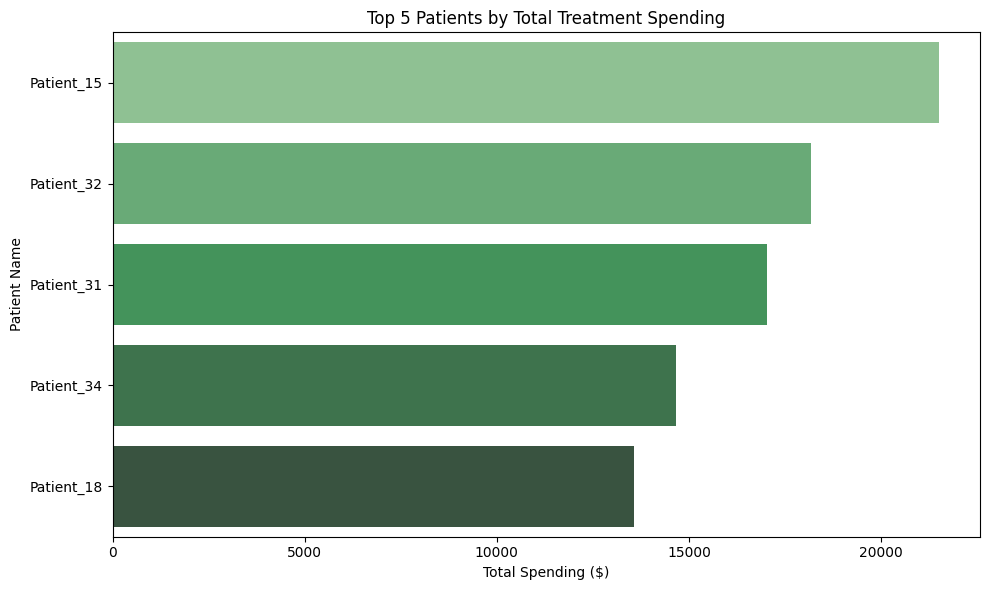

In [10]:


# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_spending,
    x='total_spending',
    y='patient_name',
    palette='Greens_d'
)

# Add chart labels and title
plt.title('Top 5 Patients by Total Treatment Spending')
plt.xlabel('Total Spending ($)')
plt.ylabel('Patient Name')

# Adjust layout and display
plt.tight_layout()
plt.show()

# 4. Advanced Insight – Frequent Patients & Visit Patterns

## Identify patients with more than 5 visits in the last year.


In [11]:
one_year_ago = (datetime.today() - timedelta(days=365)).strftime('%Y-%m-%d')

query4a = f"""
SELECT p.name AS patient_name, COUNT(v.visit_id) AS visit_count
FROM visits v
JOIN patients p ON v.patient_id = p.patient_id
WHERE visit_date >= '{one_year_ago}'
GROUP BY p.patient_id
HAVING COUNT(v.visit_id) > 5
ORDER BY visit_count DESC;
"""
df_frequent = pd.read_sql_query(query4a, conn)
print("Frequent Patients (>5 visits in last year):\n", df_frequent)

Frequent Patients (>5 visits in last year):
   patient_name  visit_count
0   Patient_17            8
1   Patient_34            7
2   Patient_15            6
3    Patient_4            6
4    Patient_2            6


In [12]:
query4b = f"""
SELECT strftime('%Y-%m', visit_date) AS visit_month, COUNT(*) AS visit_count
FROM visits
WHERE visit_date >= '{one_year_ago}'
GROUP BY visit_month
ORDER BY visit_month;
"""
df_trends = pd.read_sql_query(query4b, conn)
df_trends['visit_month'] = pd.to_datetime(df_trends['visit_month'])

print(df_trends)


  visit_month  visit_count
0  2024-06-01           12
1  2024-07-01           22
2  2024-08-01           12
3  2024-09-01           15
4  2024-10-01           18
5  2024-11-01           14
6  2024-12-01           20
7  2025-01-01           16
8  2025-02-01           16
9  2025-03-01           10


## Create a line graph to show visit trends (monthly count).

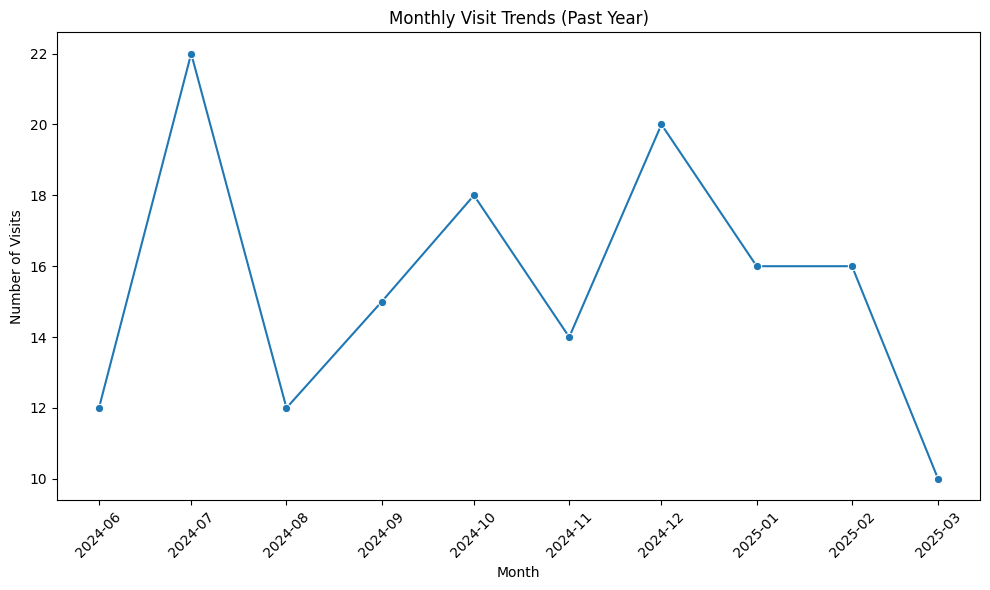

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_trends, x='visit_month', y='visit_count', marker='o')
plt.title('Monthly Visit Trends (Past Year)')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Close connection
conn.close()